# ITS307 Data Analytics : Autumn Semester 2022
# ClassWork 

# Supervised Learning 


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 2. Loading and Cleaning with Pandas

In [8]:
df = pd.read_csv('train-data.csv')
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [9]:
test = pd.read_csv('test-data.csv')
test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [10]:
df.shape

(6019, 14)

In [11]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [14]:
ndf = df.select_dtypes(include = ['int64','float64'])

In [15]:
imputeN = SimpleImputer()
nData = imputeN.fit_transform(ndf)
num = pd.DataFrame(nData, columns=ndf.columns)
num.head()

Unnamed: 0    Year  Kilometers_Driven  Seats  Price
0         0.0  2010.0            72000.0    5.0   1.75
1         1.0  2015.0            41000.0    5.0  12.50
2         2.0  2011.0            46000.0    5.0   4.50
3         3.0  2012.0            87000.0    7.0   6.00
4         4.0  2013.0            40670.0    5.0  17.74

In [16]:
num.isna().sum()

Unnamed: 0           0
Year                 0
Kilometers_Driven    0
Seats                0
Price                0
dtype: int64

In [17]:
cdf = df.select_dtypes(include = ['object', 'bool'])
imp = SimpleImputer(strategy='most_frequent')
cdata = imp.fit_transform(cdf)
cate = pd.DataFrame(cdata, columns=cdf.columns)
cate.isna().sum()

Name            0
Location        0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
New_Price       0
dtype: int64

In [18]:
num.drop(labels='Unnamed: 0', axis= 1, inplace=True)
num.head()

Year  Kilometers_Driven  Seats  Price
0  2010.0            72000.0    5.0   1.75
1  2015.0            41000.0    5.0  12.50
2  2011.0            46000.0    5.0   4.50
3  2012.0            87000.0    7.0   6.00
4  2013.0            40670.0    5.0  17.74

# 3.  EDA and Visualization

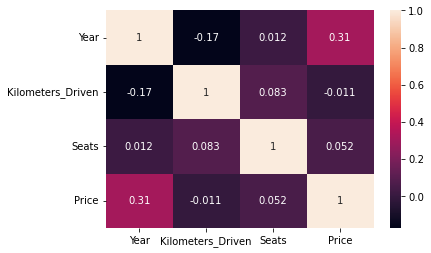

In [19]:
sns.heatmap(num.corr(), annot = True)
plt.show()

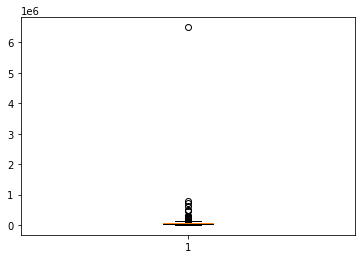

In [20]:
plt.boxplot(num['Kilometers_Driven'])
plt.show()

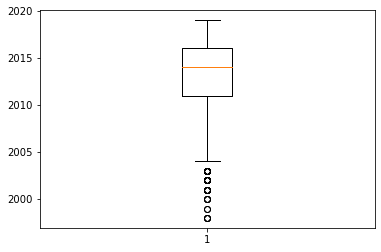

In [21]:
plt.boxplot(num['Year'])
plt.show()

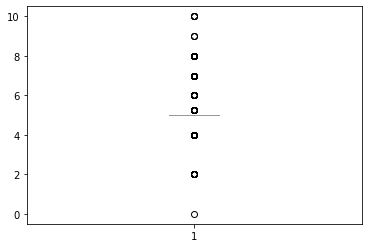

In [22]:
plt.boxplot(num['Seats'])
plt.show()

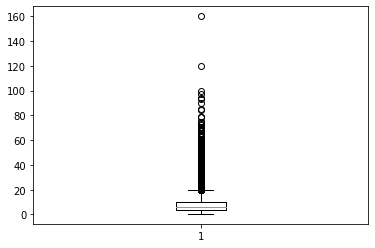

In [23]:
plt.boxplot(num['Price'])
plt.show()

# 4. Feature Engineering 

In [24]:
std = num.Kilometers_Driven.std()
mean = num.Kilometers_Driven.mean()
u_limit = mean + (3 * std)
l_limit = mean - (3 * std)
num1 = num[(num.Kilometers_Driven > l_limit) & (num.Kilometers_Driven < u_limit)]
num1.shape

(6012, 4)

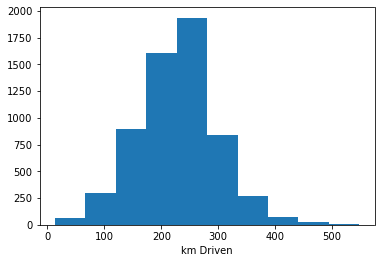

In [25]:
import numpy as np
x = np.sqrt(num1.Kilometers_Driven)
plt.hist(x)
plt.xlabel("km Driven")
plt.show()

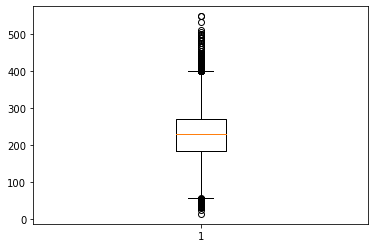

In [26]:
plt.boxplot(x)
plt.show()

In [27]:
outliers = num.index.difference(num1.index)
outliers

Int64Index([340, 358, 1860, 2328, 2823, 3092, 4491], dtype='int64')

In [28]:
ndf1 = num1.select_dtypes(include = ['int64','float64'])


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = ndf1.columns)
ndf2.head()

Year  Kilometers_Driven  Seats     Price
0  0.571429           0.239567    0.5  0.008210
1  0.809524           0.136174    0.5  0.075583
2  0.619048           0.152850    0.5  0.025445
3  0.666667           0.289595    0.7  0.034846
4  0.714286           0.135074    0.5  0.108423

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical_columns = ['Transmission']
nominal =  ohe.fit_transform(cate[categorical_columns]).toarray()
nominaldf = pd.DataFrame(nominal, columns = ohe.get_feature_names_out())
nominaldf

Transmission_Automatic  Transmission_Manual
0                        0.0                  1.0
1                        0.0                  1.0
2                        0.0                  1.0
3                        0.0                  1.0
4                        1.0                  0.0
...                      ...                  ...
6014                     0.0                  1.0
6015                     0.0                  1.0
6016                     0.0                  1.0
6017                     0.0                  1.0
6018                     0.0                  1.0

[6019 rows x 2 columns]

In [31]:
cate.head()

Name    Location Fuel_Type Transmission  \
0            Maruti Wagon R LXI CNG      Mumbai       CNG       Manual   
1  Hyundai Creta 1.6 CRDi SX Option        Pune    Diesel       Manual   
2                      Honda Jazz V     Chennai    Petrol       Manual   
3                 Maruti Ertiga VDI     Chennai    Diesel       Manual   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore    Diesel    Automatic   

  Owner_Type     Mileage   Engine      Power  New_Price  
0      First  26.6 km/kg   998 CC  58.16 bhp  4.78 Lakh  
1      First  19.67 kmpl  1582 CC  126.2 bhp  4.78 Lakh  
2      First   18.2 kmpl  1199 CC   88.7 bhp  8.61 Lakh  
3      First  20.77 kmpl  1248 CC  88.76 bhp  4.78 Lakh  
4     Second   15.2 kmpl  1968 CC  140.8 bhp  4.78 Lakh

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ordinal = oe.fit_transform(cate[['Location','Owner_Type','Fuel_Type']])
cdf3 = pd.DataFrame(ordinal, columns = ['Location','Owner_Type','Fuel_Type'])
cdf3

Location  Owner_Type  Fuel_Type
0          9.0         0.0        0.0
1         10.0         0.0        1.0
2          2.0         0.0        4.0
3          2.0         0.0        1.0
4          3.0         2.0        1.0
...        ...         ...        ...
6014       4.0         0.0        1.0
6015       6.0         0.0        1.0
6016       6.0         2.0        1.0
6017       8.0         0.0        4.0
6018       5.0         0.0        1.0

[6019 rows x 3 columns]

In [33]:
categorical_data = pd.concat([cdf3, nominaldf], axis=1)
categorical_data.drop(outliers, axis=0, inplace=True)
categorical_data

Location  Owner_Type  Fuel_Type  Transmission_Automatic  \
0          9.0         0.0        0.0                     0.0   
1         10.0         0.0        1.0                     0.0   
2          2.0         0.0        4.0                     0.0   
3          2.0         0.0        1.0                     0.0   
4          3.0         2.0        1.0                     1.0   
...        ...         ...        ...                     ...   
6014       4.0         0.0        1.0                     0.0   
6015       6.0         0.0        1.0                     0.0   
6016       6.0         2.0        1.0                     0.0   
6017       8.0         0.0        4.0                     0.0   
6018       5.0         0.0        1.0                     0.0   

      Transmission_Manual  
0                     1.0  
1                     1.0  
2                     1.0  
3                     1.0  
4                     0.0  
...                   ...  
6014                  1.0  
6015                  1.0  
6016                  1.0  
6017                  1.0  
6018                  1.0  

[6012 rows x 5 columns]

# 5. Training Model

# 6. Prediction

# 7. Evaluating your Model